In [1]:
library(ggplot2)

# Exercise 1 #

given the following un-normalized posterior distribution:

$$
g(\theta \mid x) \propto \frac{1}{2} \exp -\frac{(\theta+3)^{2}}{2}+\frac{1}{2} \exp -\frac{(\theta-3)^{2}}{2}
$$

•draw a Markov Chain from the posterior distribution using a Metropolis-Hastings algorithm

•use a Norm (0,1) as random-walk candidate density

•plot the sampled distribution

•analyze the chain with the CODA package and plot the chain autocorrelation

•try to use different burn-in cycles and thinning and plot the corresponding posterior distribution
and the chain autocorrelation function. What are the best parameters ?

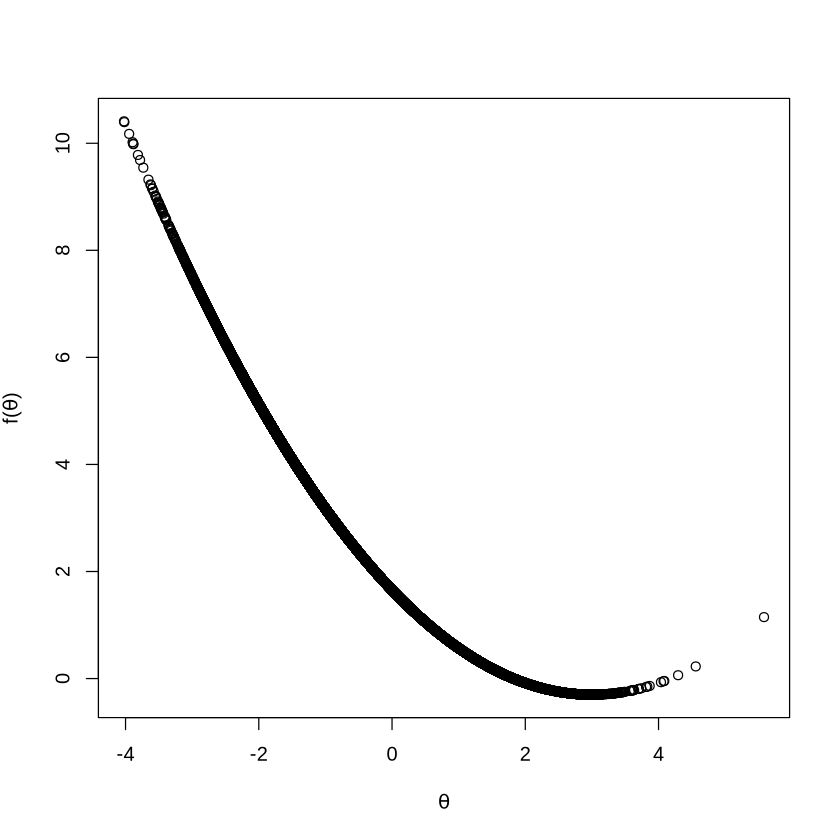

In [11]:
gfunc <- function(theta) {
    return(0.5 * exp(-((theta + 3)^2 / 2)) + 0.5 * exp((theta - 3)^2 / 2))
}

metropolis <- function(func, theta_init, n_samples) {
    # Initialization
    theta_curr <- theta_init 
    func_curr <- func(theta_curr)
    func_samp <- matrix(data=NA, nrow=n_samples, ncol=2)
    n_accept <- 0

    for (n in 1:n_samples) {
        # Extract the proposed state
        theta_prop <- rnorm(1, mean <- 0, sd <- 1)
        func_prop <- func(theta_prop)
        logMR <- func_prop - func_curr  ## Log10 of func must be given in 

        if (logMR>=0 || logMR<=rnorm(1)) {
            theta_curr <- theta_prop
            func_curr <- func_prop
            n_accept <- n_accept + 1
        }
        func_samp[n, 1] <- func_curr
        func_samp[n, 2] <- theta_curr
    }
    return(func_samp)
}

# Testing
theta_init <- 3
n_samples <- 1e5
func_test <- function(theta) {
    return(log10(gfunc(theta)))
}

set.seed(12345)
result <- metropolis(func_test, theta_init, n_samples)
#result[, 1]
a = array(result[, 1])
b = array(result[, 2])
plot(b, a, xlab = expression(theta), ylab = expression(paste('f(',theta,')', sep='')))
#result = data.frame(function = a, theta = b)
#result
